<h1>Data Sci Eng Methods</h1>
<h3>Assignment 1 – ML Data Cleaning and Feature Selection</h3>
<h4>Data Set</h4>
<a href="https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data">NIFTY-50 Stock Market Data (2000 - 2021)</a>
<h5>About Dataset</h5>
<p>The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. All datasets are at a day-level with pricing and trading values split across .cvs files for each stock along with a metadata file with some macro-information about the stocks itself. The data spans from 1st January, 2000 to 30th April, 2021.</p>
Note: The dataset contains stock data for 50 stocks 

<h5>Columns</h5>

Date - Trade Data

Symbol - Name of stock

Series - Type of security

Prev Close - Previous data closing price

Open - Opening price for the day

High - Highest price for the day

Low - Lowest price for the day

Last - Last trade price

Closes - Closing price

VWAP - Volume-weighted average price (a ratio of the cumulative share price to the cumulative volume traded over a given time period)

Volume - volume trades for the day

Turnover - The turnover ratio is ratio of sellers to buyers of a stock

Trades - Number of Trades

Deliverable Volume - Amount of deliverable volume

%Deliverble - Percentage of shares that were delivered

Note: All price are in Rupees

<h3>Aim:</h3>

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.
the distributions of the predictor variables? 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
url = "https://raw.githubusercontent.com/ChaudharyAnshul/INFO6105_Assignments/main/Nifty50_Data/NIFTY50_all.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [4]:
symbol = data["Symbol"].unique()
print(symbol)
print("Unique stock values: ", len(symbol))

['MUNDRAPORT' 'ADANIPORTS' 'ASIANPAINT' 'UTIBANK' 'AXISBANK' 'BAJAJ-AUTO'
 'BAJAJFINSV' 'BAJAUTOFIN' 'BAJFINANCE' 'BHARTI' 'BHARTIARTL' 'BPCL'
 'BRITANNIA' 'CIPLA' 'COALINDIA' 'DRREDDY' 'EICHERMOT' 'GAIL' 'GRASIM'
 'HCLTECH' 'HDFC' 'HDFCBANK' 'HEROHONDA' 'HEROMOTOCO' 'HINDALC0'
 'HINDALCO' 'HINDLEVER' 'HINDUNILVR' 'ICICIBANK' 'INDUSINDBK' 'INFOSYSTCH'
 'INFY' 'IOC' 'ITC' 'JSWSTL' 'JSWSTEEL' 'KOTAKMAH' 'KOTAKBANK' 'LT' 'M&M'
 'MARUTI' 'NESTLEIND' 'NTPC' 'ONGC' 'POWERGRID' 'RELIANCE' 'SBIN'
 'SHREECEM' 'SUNPHARMA' 'TELCO' 'TATAMOTORS' 'TISCO' 'TATASTEEL' 'TCS'
 'TECHM' 'TITAN' 'ULTRACEMCO' 'UNIPHOS' 'UPL' 'SESAGOA' 'SSLT' 'VEDL'
 'WIPRO' 'ZEETELE' 'ZEEL']
Unique stock values:  65


<h5>Some of the stock are renamed over time</h5>

MUNDRAPORT -> ADANIPORTS

BAJAUTOFIN -> BAJFINANCE

BHARTI -> BHARTIARTL

HINDLEVER -> HINDUNILVR

JSWSTL -> JSWSTEEL

KOTAKMAH -> KOTAKBANK

TELCO -> TATAMOTORS

TISCO -> TATASTEEL

UNIPHOS -> UPL

SESAGOA -> SESAGOA -> VEDL

HINDALC0 -> HINDALCO

In [5]:
#replacing the values
replace = [
    ["MUNDRAPORT","ADANIPORTS"],
    ["BAJAUTOFIN","BAJFINANCE"],
    ["BHARTI","BHARTIARTL"],
    ["HINDLEVER","HINDUNILVR"],
    ["JSWSTL","JSWSTEEL"],
    ["KOTAKMAH","KOTAKBANK"],
    ["TELCO","TATAMOTORS"],
    ["TISCO","TATASTEEL"],
    ["SESAGOA","VEDL"],
    ["SESAGOA","VEDL"],
    ["HINDALC0","HINDALCO"],
    ["UNIPHOS","UPL"],
]
for i in replace:
    data.loc[ data["Symbol"] == i[0], "Symbol"] = i[1]

In [6]:
data["Symbol"].unique()

array(['ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK', 'BAJAJ-AUTO',
       'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA',
       'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM',
       'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROHONDA', 'HEROMOTOCO',
       'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH',
       'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M',
       'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE',
       'SBIN', 'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS',
       'TECHM', 'TITAN', 'ULTRACEMCO', 'UPL', 'VEDL', 'SSLT', 'WIPRO',
       'ZEETELE', 'ZEEL'], dtype=object)

In [7]:
# the data can be categorized based on the "Symbol" since it contains all the different possible stock 
data = data.astype({'Symbol': 'category'})

In [8]:
# convert column date to type date
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                235192 non-null  datetime64[ns]
 1   Symbol              235192 non-null  category      
 2   Series              235192 non-null  object        
 3   Prev Close          235192 non-null  float64       
 4   Open                235192 non-null  float64       
 5   High                235192 non-null  float64       
 6   Low                 235192 non-null  float64       
 7   Last                235192 non-null  float64       
 8   Close               235192 non-null  float64       
 9   VWAP                235192 non-null  float64       
 10  Volume              235192 non-null  int64         
 11  Turnover            235192 non-null  float64       
 12  Trades              120344 non-null  float64       
 13  Deliverable Volume  219115 no

<h3>Q: What are the data types? (Only numeric and categorical)</h3>
A: the data types are listed below

* There are 11 colums with numeric data 'Prev Close', 'Open', 'High', 'Low', 'Last',  'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'.
* There is 1 category data 'Symbol'.
* There are 1 datetime data 'Date'.

In [10]:
data.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64

<h3>Q: Are there missing values?</h3>
A: There are NaN values present in the data, the dataset captured 0 as Null/NaN hence filling the null values with 0 for Trades, Deliverable Volume and %Deliverble.

Explained below:

<b>Number of Trades</b> can be 0 - It's very simple to understand that if the deal which is comprised of sellers and buyers is zero, the buyers and sellers for that trade aren't buying or selling. 
Volumes are always positive if not zero and can be represented as the number of trades per day for a commodity, stock, options or future

<b>Deliverable Volume</b> can be 0 - In the context of stock trading and financial markets, "deliverable volume" typically refers to the number of shares of a particular stock that are traded and actually delivered to the buyer or seller during a trading session. It represents the number of shares that have changed ownership.there are some situations where deliverable volume might be very low, or zero for certain stocks.

<b>%Deliverble</b> can be 0 - It is possible for the "% Deliverable" (percentage of shares that were delivered) of a stock to be zero or close to zero on a particular trading day. "% Deliverable" is a measure that indicates the proportion of shares traded for a particular stock on a given day that were actually delivered to the buyers' accountss.

In [11]:
# replace null values with 0 based on the above explanation
data["Trades"].fillna(0, inplace = True)
data["Deliverable Volume"].fillna(0, inplace = True)
data["%Deliverble"].fillna(0, inplace = True)

In [12]:
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

<h3>Q: Which independent variables have missing data? How much?</h3>
A: There are no missing data present in the dataset, since in the above code the null values are already handled. 

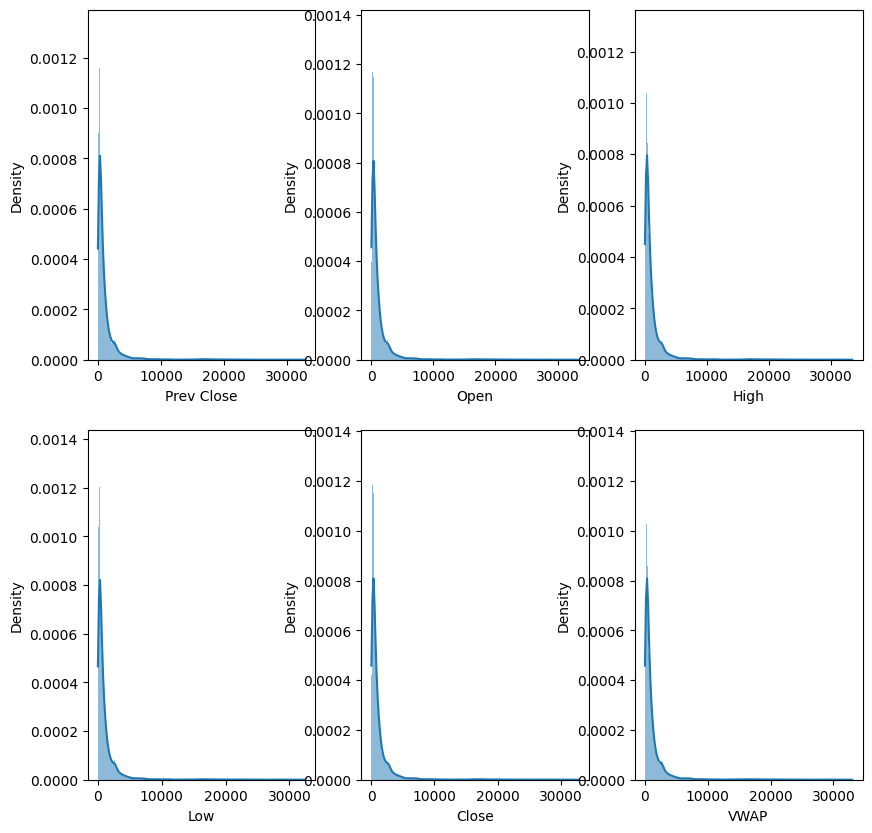

In [13]:
# density distrubution for entire data set
plt.subplot(231)
sns.histplot(data['Prev Close'], kde=True, stat="density", linewidth=0)

plt.subplot(232)
sns.histplot(data['Open'], kde=True, stat="density", linewidth=0)

plt.subplot(233)
sns.histplot(data['High'], kde=True, stat="density", linewidth=0)

plt.subplot(234)
sns.histplot(data['Low'], kde=True, stat="density", linewidth=0)

plt.subplot(235)
sns.histplot(data['Close'], kde=True, stat="density", linewidth=0)

plt.subplot(236)
sns.histplot(data['VWAP'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

<h4>Inference:</h4>

* All the distributions show similar distribution properties
* All the distributions are are right skewed, that means they are positively skewed


Need to select indivisual stocks and verify the skewness of data, since different socks trade in different price range. 

In [14]:
# Selecting individual Stocks to carry forward the analysis

# ADANIPORTS
data_ap = data.loc[ data["Symbol"] == "ADANIPORTS"]
# HDFCBANK
data_hb = data.loc[ data["Symbol"] == "HDFCBANK"]

In [15]:
# Dropping Columns since they are not important
data_ap = data_ap.drop(labels=["Series","Symbol"], axis=1)
data_ap.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,0.0,9859619.0,0.3612
1,2007-11-28,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,0.0,1453278.0,0.3172
2,2007-11-29,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,0.0,1069678.0,0.2088
3,2007-11-30,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,0.0,1260913.0,0.2735
4,2007-12-03,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,0.0,816123.0,0.2741


In [16]:
# Dropping Columns since they are not important
data_hb = data_hb.drop(labels=["Series","Symbol"], axis=1)
data_hb.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
80365,2000-01-03,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,0.0,0.0,0.0
80366,2000-01-04,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,0.0,0.0,0.0
80367,2000-01-05,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,0.0,0.0,0.0
80368,2000-01-06,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,0.0,0.0,0.0
80369,2000-01-07,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,0.0,0.0,0.0


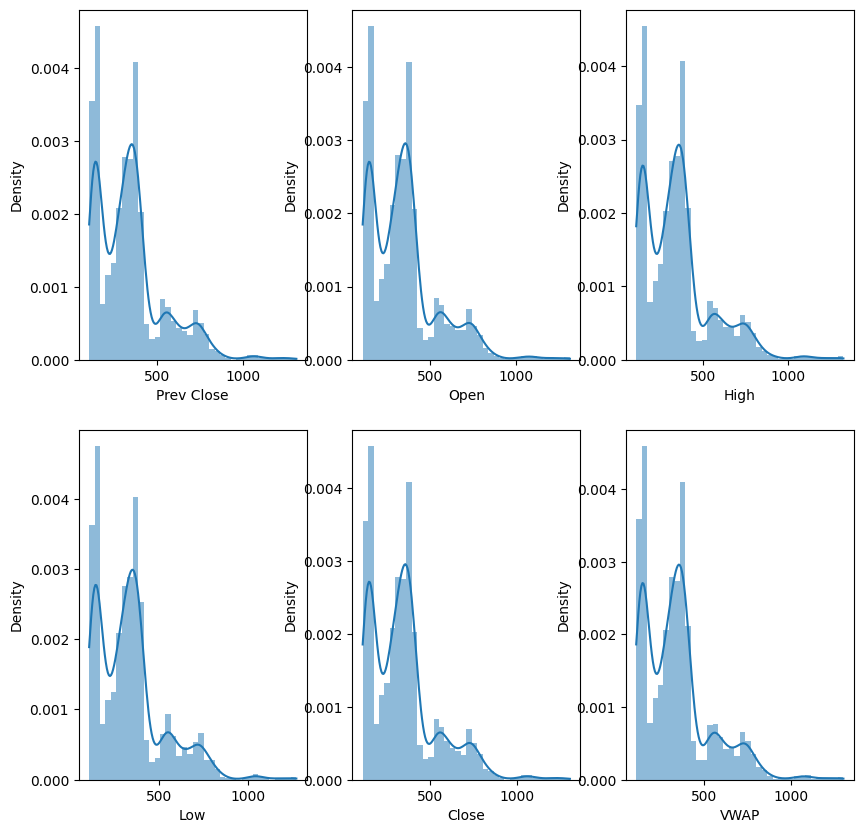

In [17]:
# density distrubution for ADANIPORTS
plt.subplot(231)
sns.histplot(data_ap['Prev Close'], kde=True, stat="density", linewidth=0)

plt.subplot(232)
sns.histplot(data_ap['Open'], kde=True, stat="density", linewidth=0)

plt.subplot(233)
sns.histplot(data_ap['High'], kde=True, stat="density", linewidth=0)

plt.subplot(234)
sns.histplot(data_ap['Low'], kde=True, stat="density", linewidth=0)

plt.subplot(235)
sns.histplot(data_ap['Close'], kde=True, stat="density", linewidth=0)

plt.subplot(236)
sns.histplot(data_ap['VWAP'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

<h5>Similar to above Inference</h5>

* All the distributions show similar distribution properties
* All the distributions are right skewed shwoing positive skeweness

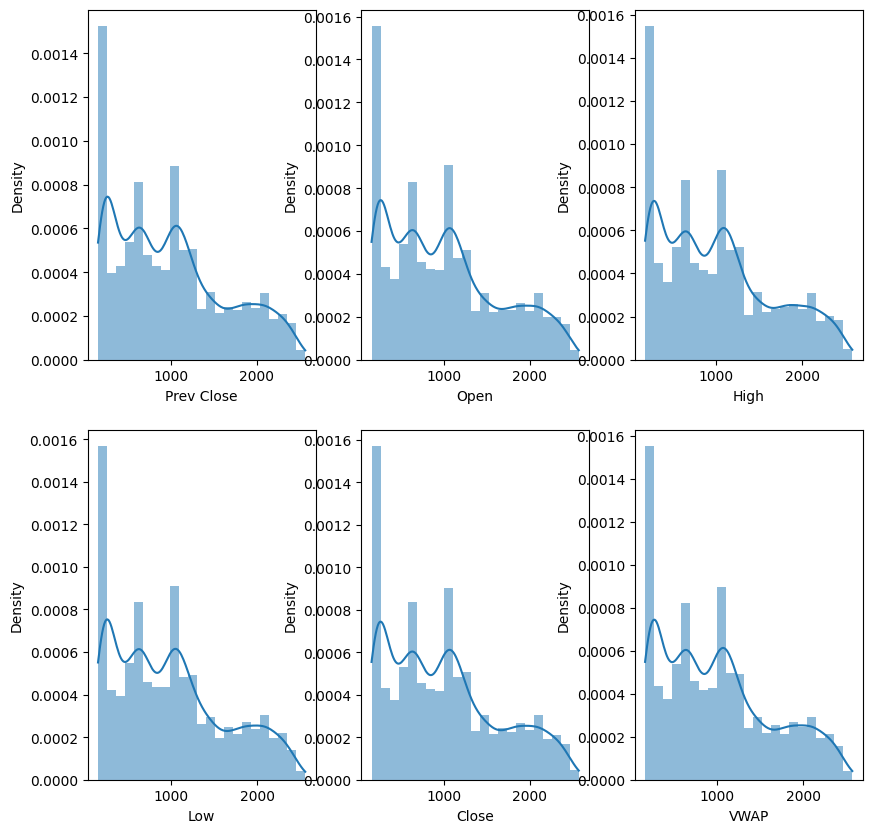

In [18]:
# density distrubution for HDFCBANK
plt.subplot(231)
sns.histplot(data_hb['Prev Close'], kde=True, stat="density", linewidth=0)

plt.subplot(232)
sns.histplot(data_hb['Open'], kde=True, stat="density", linewidth=0)

plt.subplot(233)
sns.histplot(data_hb['High'], kde=True, stat="density", linewidth=0)

plt.subplot(234)
sns.histplot(data_hb['Low'], kde=True, stat="density", linewidth=0)

plt.subplot(235)
sns.histplot(data_hb['Close'], kde=True, stat="density", linewidth=0)

plt.subplot(236)
sns.histplot(data_hb['VWAP'], kde=True, stat="density", linewidth=0)
fig = plt.gcf()
fig.set_size_inches(10,10)

<h5>Inference:</h4>
* All the distributions show similar distribution properties
* All the distributions are right skewed shwoing positive skeweness

<h3>Q: What are the likely distributions of the numeric variables?</h3>

A: For the above density distributions it is observed that the distrubutions are right-skewed showing Log-Normal distrubution.

<h3>Q: What are the distributions of the predictor variables?</h3>
A: Predictor variables are identified below theay are - ["Prev Close", "Open", "High", "Low", Last", "VWAP"]. As per the graph above we can see that the predictors are skewed towards right resulting in Positively skewed (right-skewed) distributions.

<Axes: >

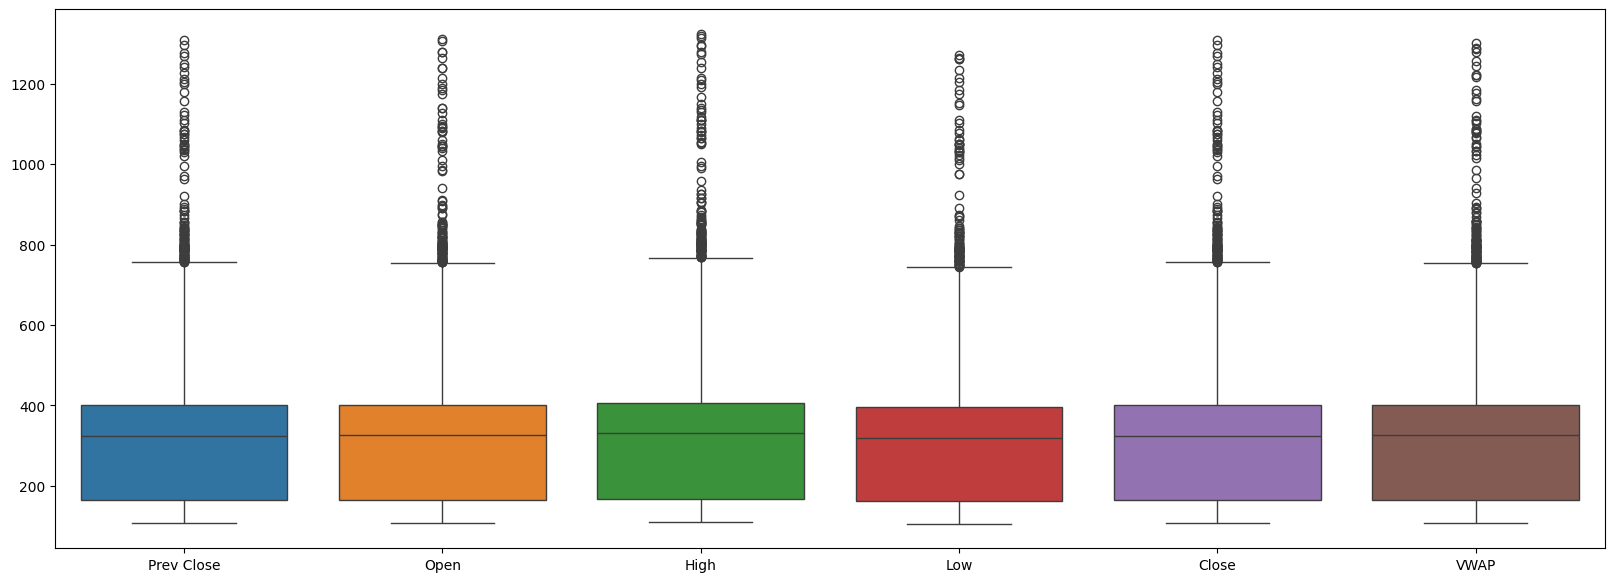

In [19]:
# Checking the Ranges of the predictor variables and dependent variables for ADANIPORTS
plt.figure(figsize=(20, 7))
sns.boxplot(data=data_ap[["Prev Close", "Open", "High", "Low", "Close", "VWAP"]])

<h5>Inference:</h5>

Looking at the box plot above it can be infered that the values are in the same range and there are outliers present in all the columns. Considering the fact that the data is for a stock it is possible that the pice would have shoot up which explains the outliers exceeding the maximum value."

<Axes: >

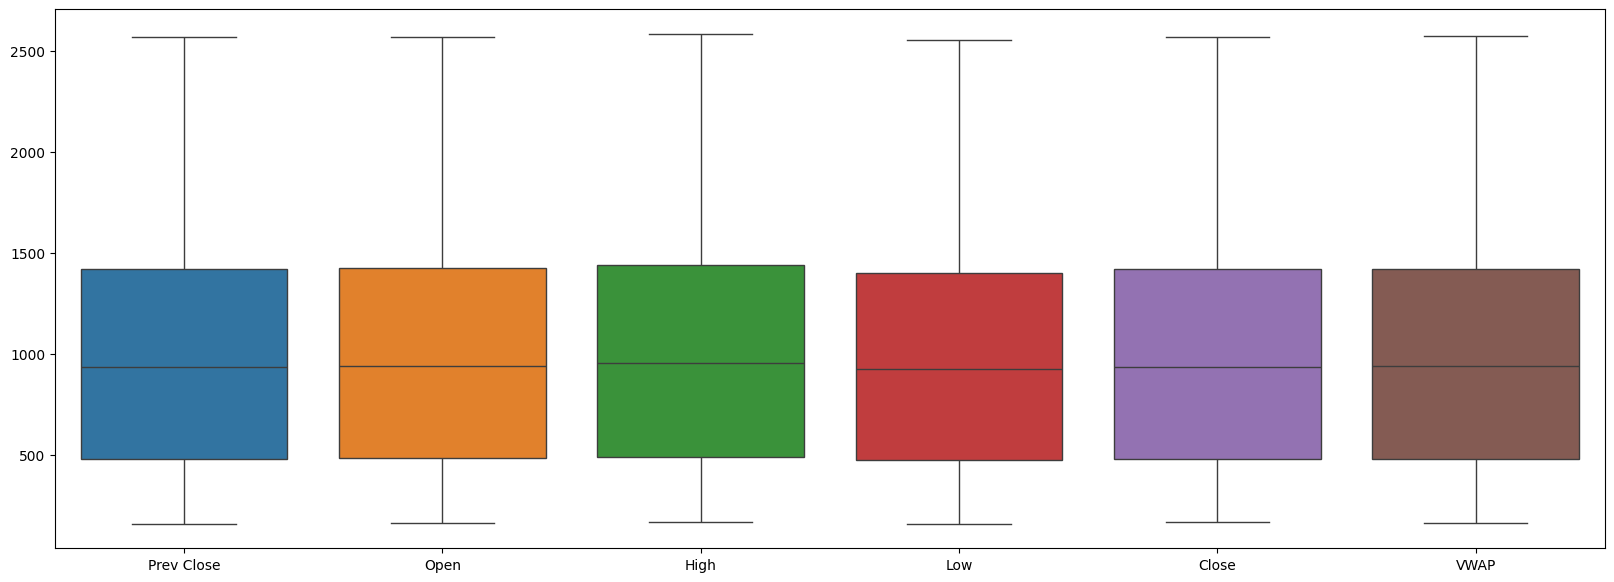

In [20]:
# Checking the Ranges of the predictor variables and dependent variables for HDFCBANKHDFCBANK
plt.figure(figsize=(20, 7))
sns.boxplot(data=data_hb[["Prev Close", "Open", "High", "Low", "Close", "VWAP"]])

<h4>Inference:</h4>

Looking at the box plot above it can be infered that the values are in the same range and no data transformation is required.

<h3>Q: Do the ranges of the predictor variables make sense?</h3>
A: The range of dataset makes sense as all the variablees have similar Min and Max. The values are within expected and resonable range based on the nature of the variable. 

<h4>Feature Selection Methods</h4>

1. Correlation Coefficient
2. SelectKBest
3. f_regression


Target variable is "Close"

<h4>Method 1: Correlation Coefficient</h4>

<Axes: >

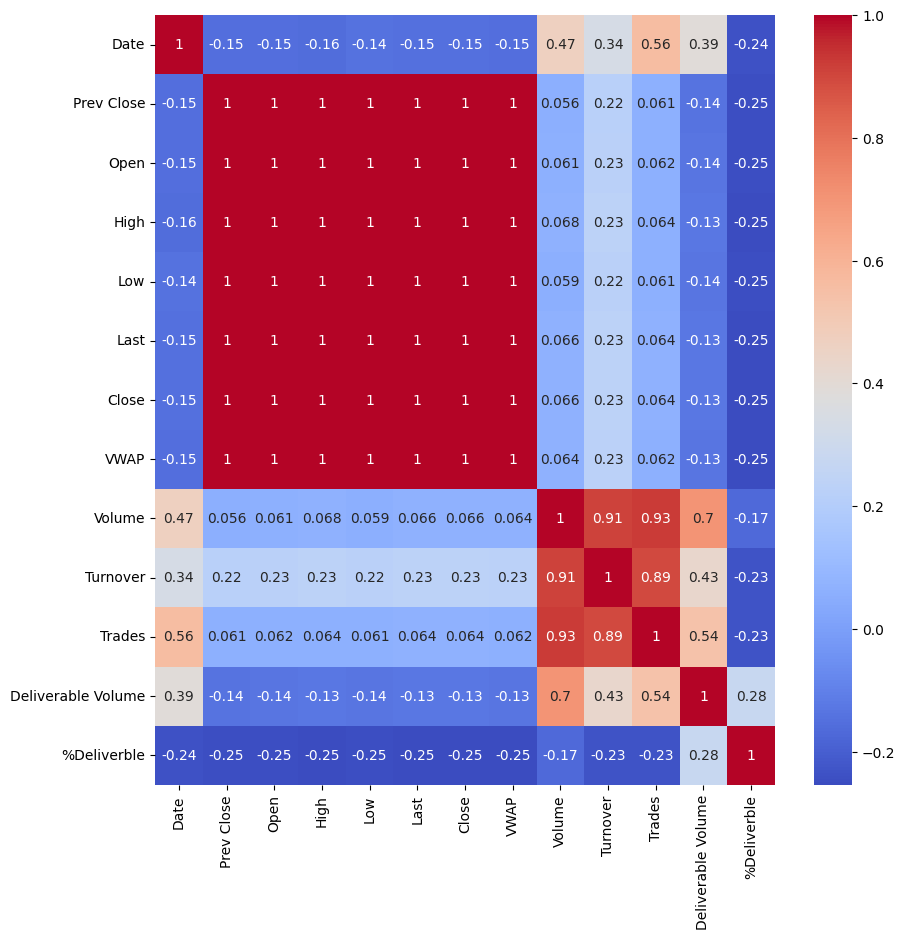

In [21]:
# correlation matrix for Asianpaints
corr = data_ap.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

<Axes: >

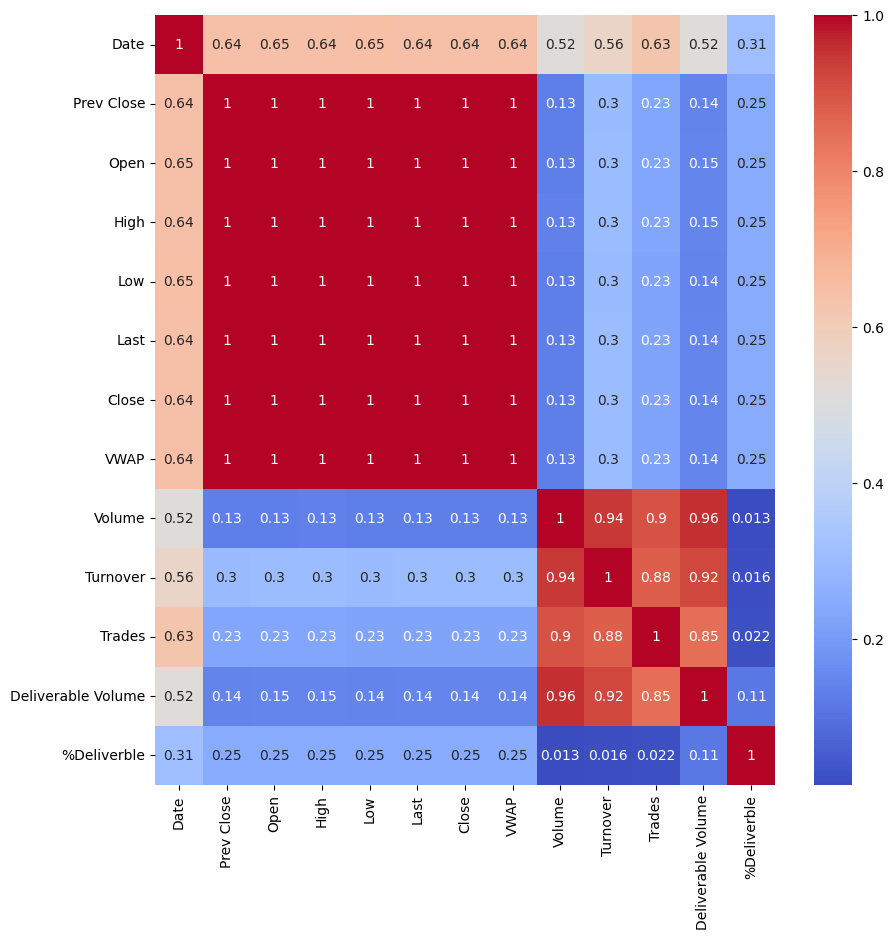

In [22]:
# correlation matrix for HDFCBank
corr = data_hb.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

<h4>Inference:</h4> 
Based on the above matix "Prev Close", "Open", "High", "Low", Last", "VWAP" are strongly correlated with the tardet variable. This indicates a significant relationship with the target.

In [23]:
# spliting the dependent and independent variables
X_ap,y_ap = data_ap.drop(labels=["Date","Close"], axis=1), data_ap["Close"]
X_hb,y_hb = data_hb.drop(labels=["Date","Close"], axis=1), data_hb["Close"]

<h4>Method 2: SelectKBest</h4>

In [24]:
# selectKBest method
for i in range(2,12):
    selector_1 = SelectKBest(score_func=f_classif, k=i)
    selector_2 = SelectKBest(score_func=f_classif, k=i)
    
    selector_1.fit_transform(X_ap, y_ap)
    selected_features_mask_1 = selector_1.get_support()

    selector_2.fit_transform(X_hb, y_hb)
    selected_features_mask_2 = selector_2.get_support()

    print("for AsianPaints K = ",i)
    print("selected values: ", [v for v, b in zip(X_hb.columns, selected_features_mask_1) if b == True ])

    print("for HDFCBank K = ",i)
    print("selected values: ", [v for v, b in zip(X_hb.columns, selected_features_mask_1) if b == True ])
    

for AsianPaints K =  2
selected values:  ['Last', 'VWAP']
for HDFCBank K =  2
selected values:  ['Last', 'VWAP']
for AsianPaints K =  3
selected values:  ['High', 'Last', 'VWAP']
for HDFCBank K =  3
selected values:  ['High', 'Last', 'VWAP']
for AsianPaints K =  4
selected values:  ['High', 'Low', 'Last', 'VWAP']
for HDFCBank K =  4
selected values:  ['High', 'Low', 'Last', 'VWAP']
for AsianPaints K =  5
selected values:  ['Open', 'High', 'Low', 'Last', 'VWAP']
for HDFCBank K =  5
selected values:  ['Open', 'High', 'Low', 'Last', 'VWAP']
for AsianPaints K =  6
selected values:  ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP']
for HDFCBank K =  6
selected values:  ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP']
for AsianPaints K =  7
selected values:  ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Turnover']
for HDFCBank K =  7
selected values:  ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Turnover']
for AsianPaints K =  8
selected values:  ['Prev Close', 'O

<h5>This shows based on the k values, all independent variables that affect the dependent variables</h5>

<h4>Method 3: f_regression</h4>

In [25]:
#f_regression method
f_scores_ap, p_values_ap = f_regression(X_ap, y_ap)

print("f-scores and p-values for Asianpaints")
print("F-scores:")
print(list(zip(X_ap.columns, f_scores_ap)))
print("p-values:")
print(list(zip(X_ap.columns, p_values_ap)))

f_scores_hb, p_values_hb = f_regression(X_hb, y_hb)

print("\n\nf-scores and p-values for HDFCBank")
print("F-scores:")
print(list(zip(X_hb.columns, f_scores_hb)))
print("p-values:")
print(list(zip(X_hb.columns, p_values_hb)))

f-scores and p-values for Asianpaints
F-scores:
[('Prev Close', 342856.4613553928), ('Open', 801142.276698572), ('High', 1760123.4995902863), ('Low', 1511609.106108431), ('Last', 42835031.119954295), ('VWAP', 5219150.108215814), ('Volume', 14.730959617742199), ('Turnover', 187.59463309290686), ('Trades', 13.838401245051452), ('Deliverable Volume', 58.390174301157124), ('%Deliverble', 228.134666312034)]
p-values:
[('Prev Close', 0.0), ('Open', 0.0), ('High', 0.0), ('Low', 0.0), ('Last', 0.0), ('VWAP', 0.0), ('Volume', 0.00012630330454410456), ('Turnover', 1.4078916875885543e-41), ('Trades', 0.00020251950272308123), ('Deliverable Volume', 2.7946408907962756e-14), ('%Deliverble', 6.674554226087871e-50)]


f-scores and p-values for HDFCBank
F-scores:
[('Prev Close', 1532822.917075687), ('Open', 5400220.364381418), ('High', 10430918.96078636), ('Low', 8997059.896007162), ('Last', 156224693.46394044), ('VWAP', 34935500.06658622), ('Volume', 92.93395433177426), ('Turnover', 518.4063257724832)

<h5>Smaller p-values indicate a stronger relationship between the feature and the target variable</h5>

<h3>Q: Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)</h3>
A: Based on the 3 methods shown above it can observed that 

* heatmap: there are 6 independent variables are more useful in prediction "Prev Close", "Open", "High", "Low", Last", "VWAP".

* SelectKBest: it can be observed that as we keep increasing the K value the variables based on importance are increased with K. We ge the priority order of the features but we still need some more infromation to find the main features.

* f_regression: based on the p-values of the independent variables it can be observed that 6 features have p-value as 0, ('Prev Close', 0.0), ('Open', 0.0), ('High', 0.0), ('Low', 0.0), ('Last', 0.0), ('VWAP', 0.0)

we can conclude based on the 3 results that 6 features are important in the prediction of Close Price.


<h3>Q: In the predictor variables independent of all the other predictor variables?</h3>
A: From the heatmap above we can observe that the predictor variables are Multicollinearity among each other.

Predictor: "Prev Close", "Open", "High", "Low", Last", "VWAP".

<h3>Q: Which predictor variables are the most important?</h3>
A: Based on the feature selection above following are the most imporant

* "Prev Close"
* "Open"
* "High"
* "Low"
* "Last"
* "VWAP"

In [26]:
# split the data into training and testing for Asianpaints
X_train_ap, X_test_ap, y_train_ap, y_test_ap = train_test_split(X_ap, y_ap, test_size=0.2, random_state=42)

# split the data into training and testing for HDFCBank
X_train_hb, X_test_hb, y_train_hb, y_test_hb = train_test_split(X_hb, y_hb, test_size=0.2, random_state=42)

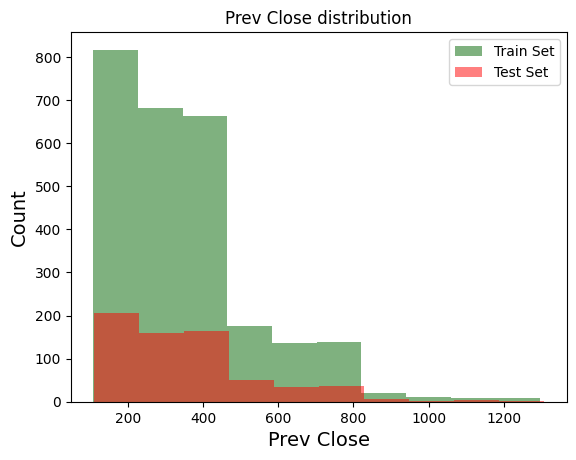

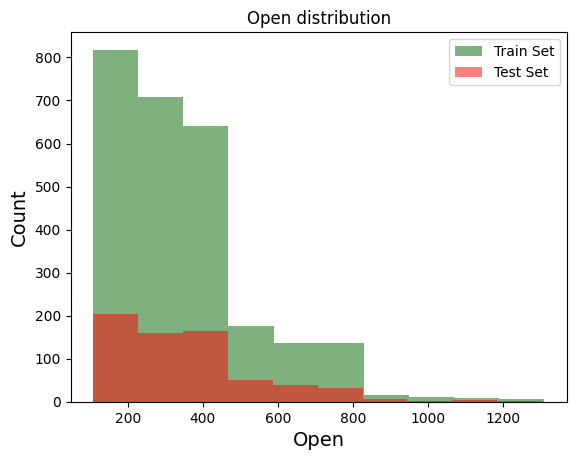

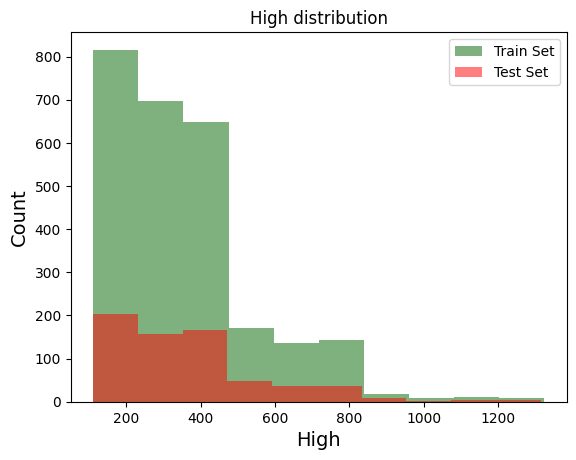

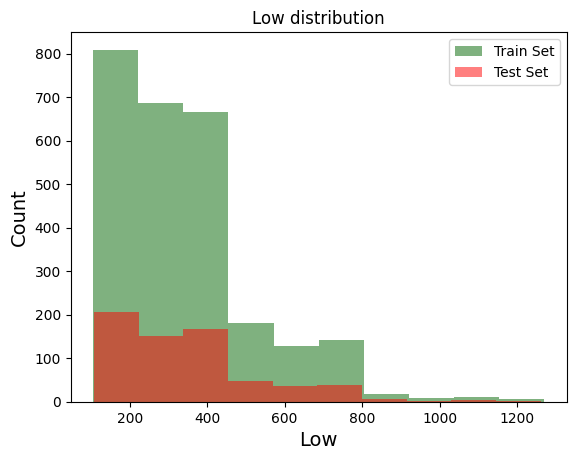

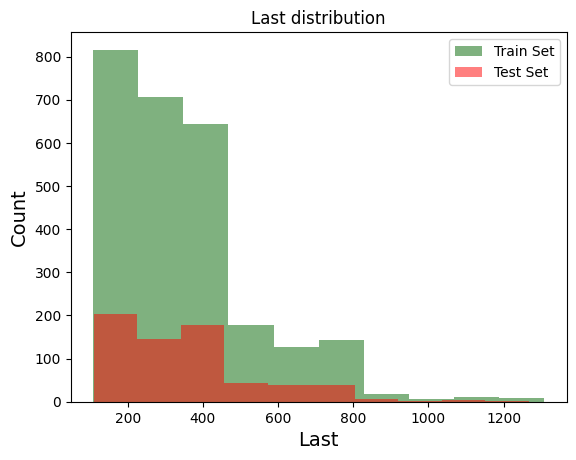

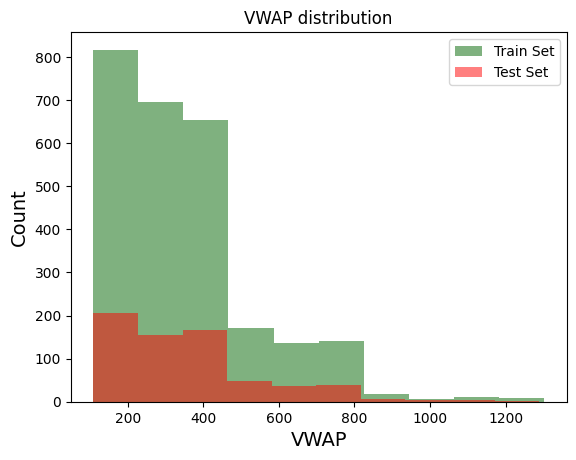

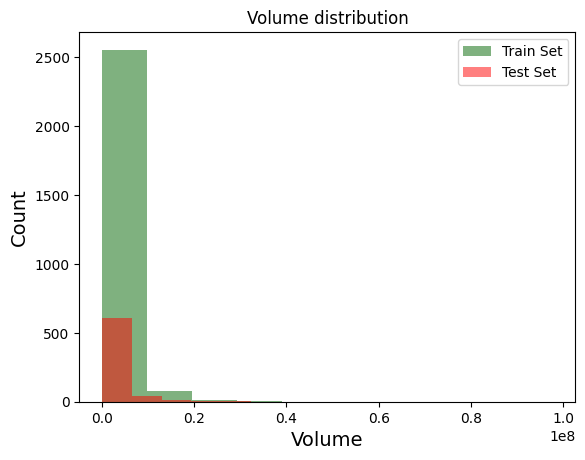

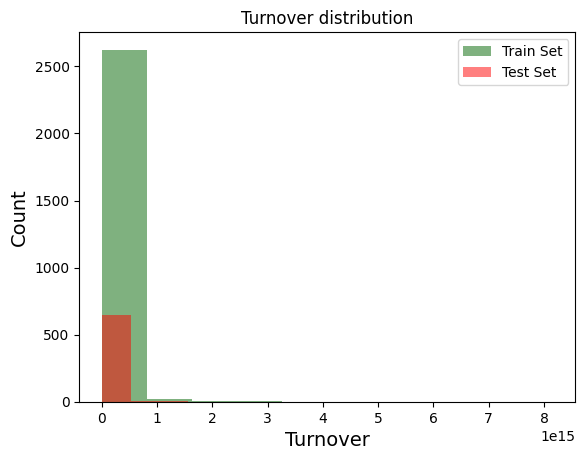

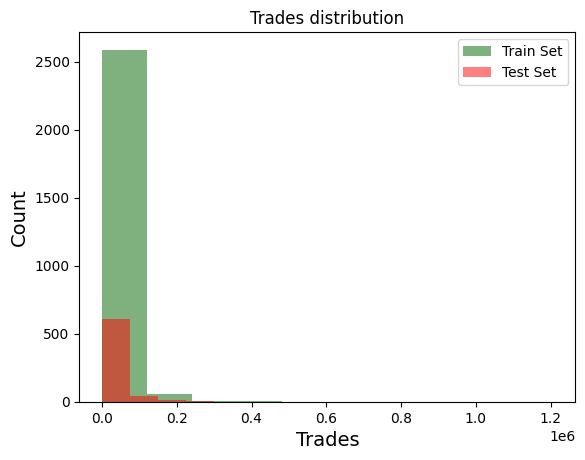

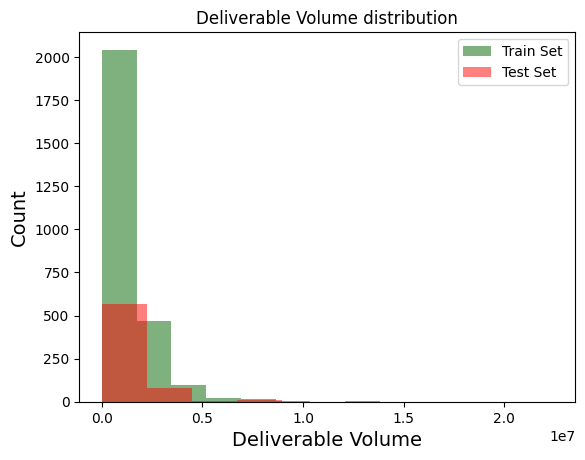

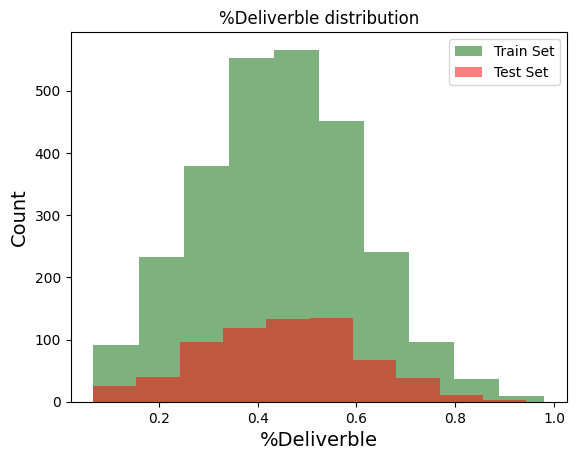

In [27]:
#Plotting the data to see the histogram for Asianpaints
for c in X_test_ap.columns:
    plt.hist(X_train_ap[c], bins=10, alpha=0.5, label="Train Set", color="darkgreen")
    plt.hist(X_test_ap[c], bins=10, alpha=0.5, label="Test Set", color ="red")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(c))
    plt.show()

<h5>Inference:</h5>

* By looking at the split of data it looks like data is properly distributed in the ratio of 80%:20% for train and test respectively
* it looks like as we move towards the right on x-axis the split of train:test decreases.

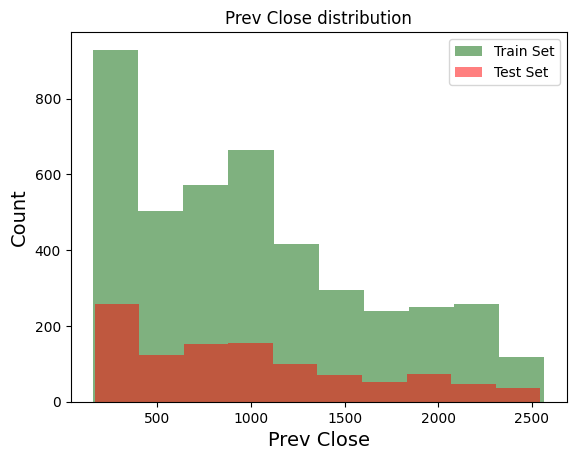

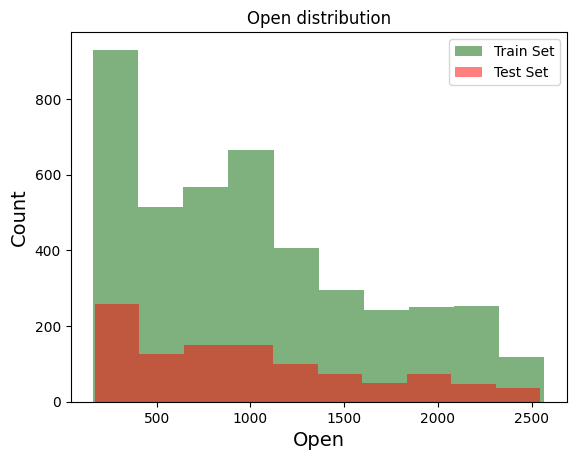

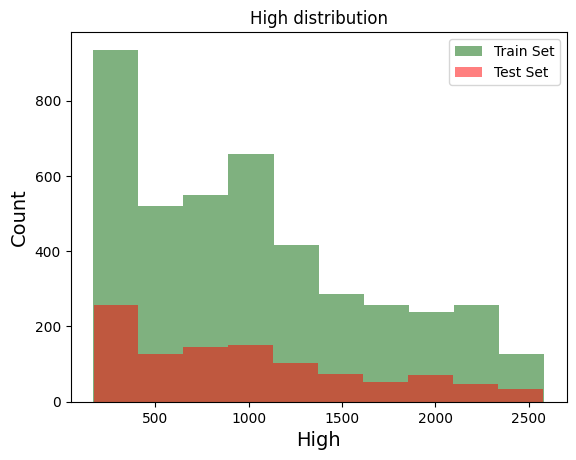

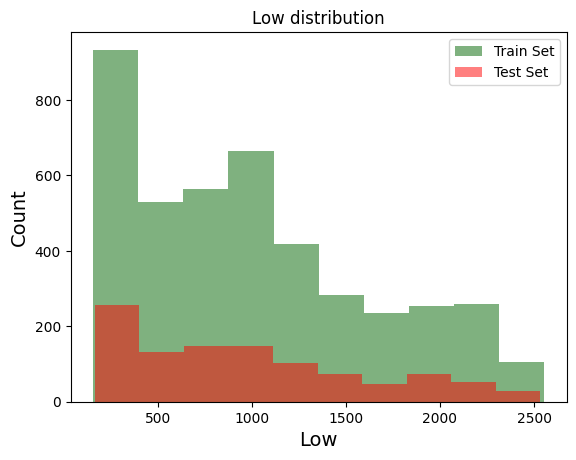

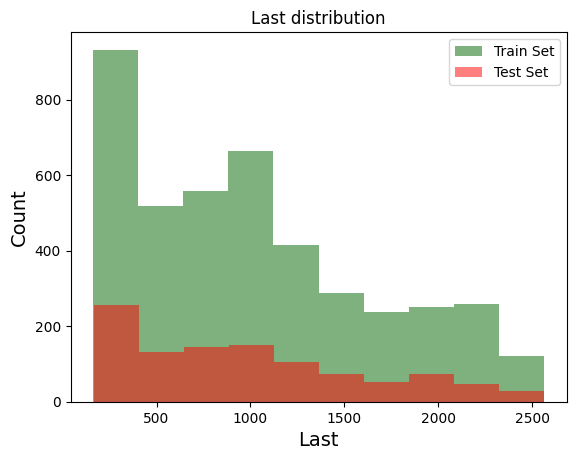

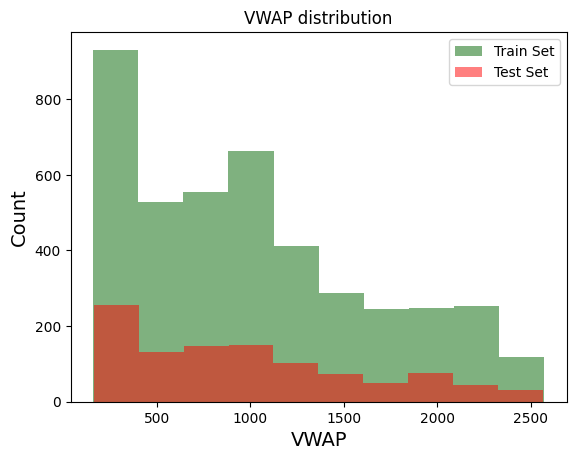

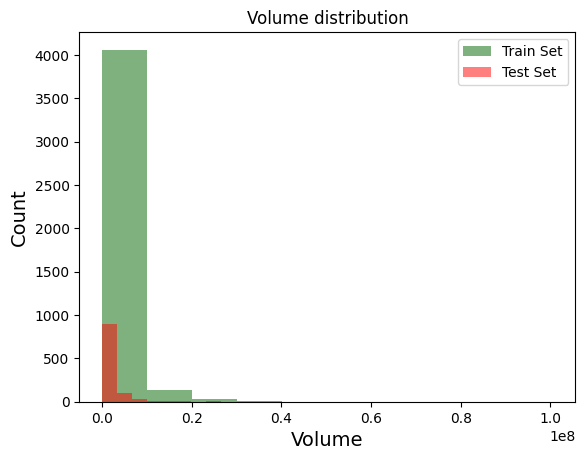

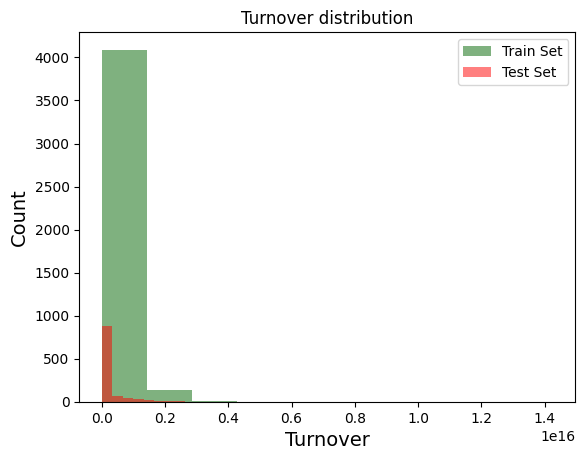

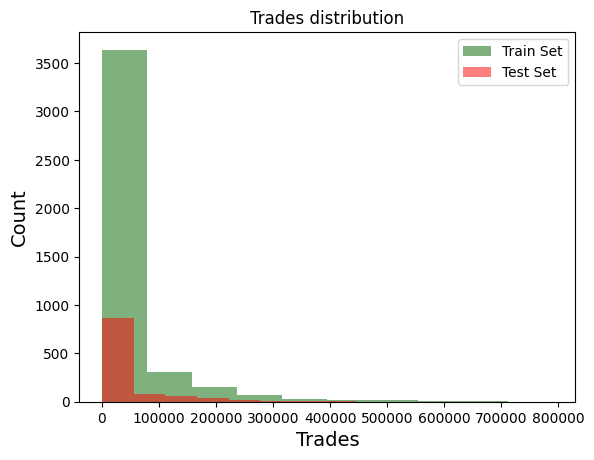

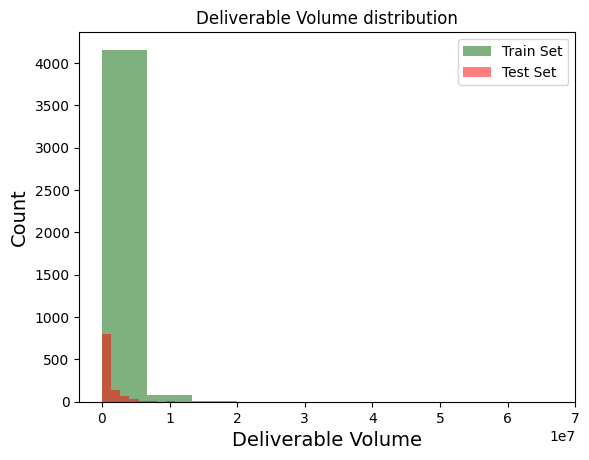

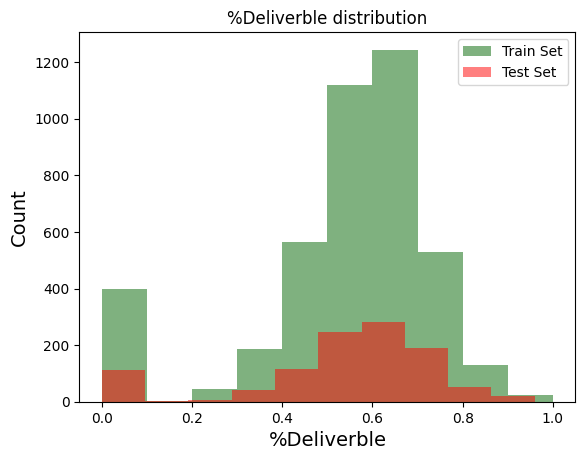

In [28]:
#Plotting the data to see the histogram for HDFCBank
for c in X_test_hb.columns:
    plt.hist(X_train_hb[c], bins=10, alpha=0.5, label="Train Set", color="darkgreen")
    plt.hist(X_test_hb[c], bins=10, alpha=0.5, label="Test Set", color ="red")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(c))
    plt.show()

<h5>Inference:</h5>

* By looking at the split of data it looks like data is properly distributed in the ratio of 80%:20% for train and test respectively
* It looks like from the above split the data is split uniformly across all values.

<h3>Q: Do the training and test sets have the same data?</h3>
A: No, the test and train data dont have same data vaues. This is the stock price for each day so the chance of the open, close, high, low and vwap combined to be same between 2 days is nearing 0.

<h3>Linear regression Model</h3>

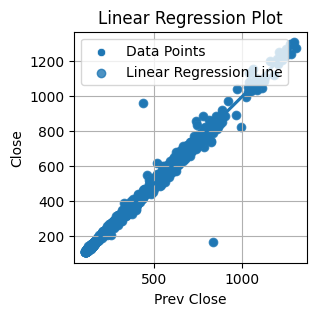

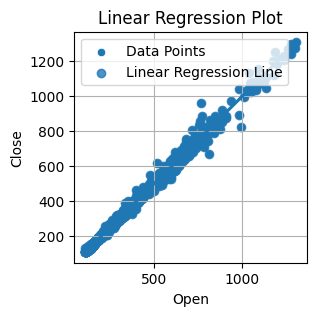

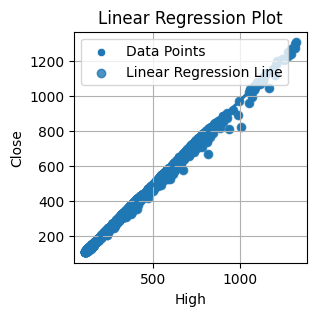

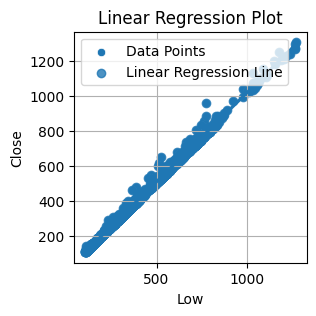

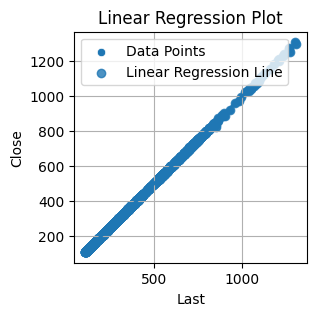

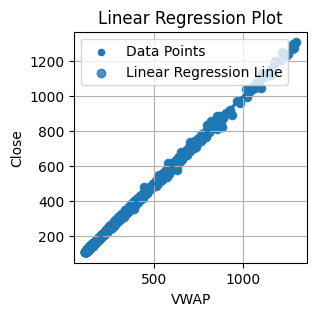

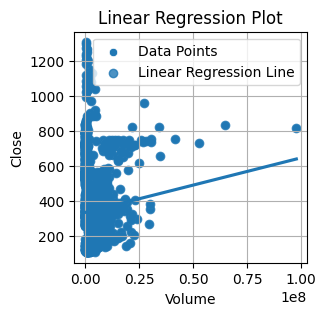

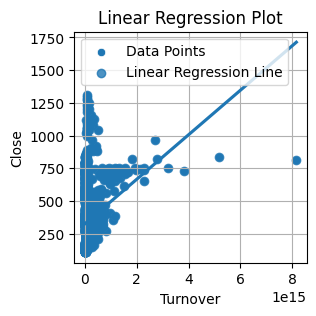

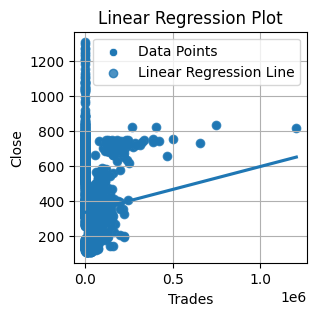

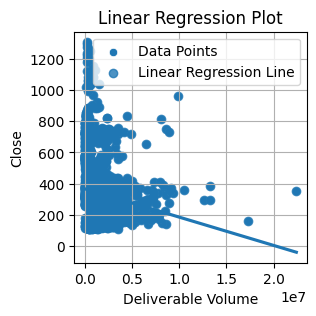

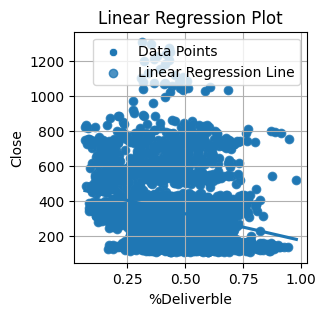

In [45]:
# Create a scatter plot with the data points for Asianpaints
for i in X_ap:
    plt.figure(figsize=(3, 3))
    sns.scatterplot(x=X_ap[i], y=y_ap, label='Data Points')
    
    # Fit a linear regression line to the data
    sns.regplot(x=X_ap[i], y=y_ap, ci=None, label='Linear Regression Line')
    
    # Add labels and a legend
    plt.xlabel(i)
    plt.ylabel('Close')
    plt.title('Linear Regression Plot')
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()

<h4>Inference:</h4>
It can be obsedved that the 6 features we selected from feature selection show a linear relationship with the target variable

<h3>Model Training</h3>
Training a linera regression model for Asianpaints and HDFCBank
<h4>Training the model with featurs that impact the target value the most</h4>

In [85]:
# keep relavent columns after feature selection
X_train_ap, X_test_ap = X_train_ap[["Prev Close", "Open", "High", "Low", "Last", "VWAP"]], X_test_ap[["Prev Close", "Open", "High", "Low", "Last", "VWAP"]]
X_train_hb, X_test_hb = X_train_hb[["Prev Close", "Open", "High", "Low", "Last", "VWAP"]], X_test_hb[["Prev Close", "Open", "High", "Low", "Last", "VWAP"]]

In [86]:
# model for Asianpaints
model_ap = LinearRegression()
# model for HDFCBank
model_hb = LinearRegression()

In [87]:
#fit the model with Asianpaints data
model_ap.fit(X_train_ap_new, y_train_ap)

LinearRegression()

In [88]:
#fit the model with HDFCBank data
model_hb.fit(X_train_hb, y_train_hb)

LinearRegression()

In [89]:
# predict Asianpaint
y_pred_ap = model_ap.predict(X_test_ap)

In [94]:
from sklearn.metrics import r2_score, mean_squared_error
r2_ap = r2_score(y_test_ap, y_pred_ap)
print("R-squared:", r2_ap)

R-squared: 0.999946398106875


In [91]:
# predict HDFCBank
y_pred_hb = model_hb.predict(X_test_hb)

In [92]:
r2_hb = r2_score(y_test_hb, y_pred_hb)
print("R-squared:", r2_hb)

R-squared: 0.9999801084702149


<h4>Inference:</h4>

* The R-squared value is nearing 1 in both the cases
* R-squared metric helps understant that the regression model is a good fit to the data, 

In [101]:
# Mean Squared Error for Asianpaint model
mse_ap = mean_squared_error(y_test_ap, y_pred_ap)
print("Mean of Asian Paint data:", y_test_ap.mean())
print("Mean Squared Error:", mse_ap)

Mean of Asian Paint data: 350.8948872180451
Mean Squared Error: 2.1054504508964285


In [102]:
# Mean Squared Error for HDFCBank model
mse_hb = mean_squared_error(y_test_hb, y_pred_hb)
print("Mean of HDFC Bank data:", y_test_hb.mean())
print("Mean Squared Error:", mse_hb)

Mean of HDFC Bank data: 982.6203389830509
Mean Squared Error: 7.979219350329038


<h4>Inference:</h4>

* The mean squared error of both the model is significally lower then their respected mean values indecating a good fit of model